## State of Indian Prisons

### Data


National Human Rights council, the apex body in Indian Union which is responsible for inspection and vigilance over Prisons, is often clogged with complains related to poor state of Indian Prisons. 

National Crime Records Bureau under Minister of Home Affairs regularly releases prison data. For this exploratory analysis, we are using the latest (2018) data-set available on Open Government Data (OGD) platform (https://data.gov.in/ministrydepartment/national-crime-records-bureau-ncrb). It is a statewise data spread over mutiple tables.


### Research Question

Overcrowding is one of the biggest complaint against Indian Prisons. We want to figure out the states running on over-capacity and likely factors behind it.  


### Exploratory Data Analysis


In [2]:
# Importing the Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [48]:
#Importing the .csv file as pandas dataframe. 


jail_occup = pd.read_csv('Jail_Occupancy.csv', index_col = 1)



In [47]:
# Now we want to understand the type of data stored in this file. 

print(jail_occup.shape)

(36, 7)


In [5]:
#Next we try to find the names of variables. 

print(jail_occup.columns)

Index(['Index', 'Convicts', 'Undertrials', 'Detenues', 'Others',
       'Total Prisoners', 'Total Occupancy Rate'],
      dtype='object')


We see that 'Total Occupancy Rate' is one of the variables. 


In [6]:
# Printing first few rows to better understand the data-set. 

print(jail_occup.head(4))

                   Index  Convicts  Undertrials  Detenues  Others  \
State                                                               
Andhra Pradesh         1      2742         4197        29      13   
Arunachal Pradesh      2       127          118         0       0   
Assam                  3      3178         5025         4       3   
Bihar                  4      7184        31421         3       5   

                   Total Prisoners  Total Occupancy Rate  
State                                                     
Andhra Pradesh                6981                  79.5  
Arunachal Pradesh              245                 105.2  
Assam                         8210                  93.2  
Bihar                        38613                  93.3  


Now let us figure out the states where Total Occupancy Rate is greater than 100% i.e. They are running on over-capacity.

In [7]:
print(jail_occup[['Total Occupancy Rate']][jail_occup['Total Occupancy Rate'] > 100].sort_values('Total Occupancy Rate', ascending=False))

                   Total Occupancy Rate
State                                  
Uttar Pradesh                     176.5
Sikkim                            157.3
Delhi                             154.3
Chhattisgarh                      153.3
Uttarakhand                       150.0
Maharashtra                       148.9
Madhya Pradesh                    147.0
Meghalaya                         143.5
Jharkhand                         128.2
Jammu & Kashmir                   116.0
Gujarat                           112.3
Kerala                            112.2
West Bengal                       106.1
Arunachal Pradesh                 105.2
Mizoram                           104.7
Haryana                           104.3
Himachal Pradesh                  103.5
Karnataka                         101.7


So clearly there are a lot of Big States in India where the prisons are operating at around 150% occupancy rates. Chief among them includes Uttar Pradesh, Maharastra, Delhi, Madhya Pradesh and Chattisgarh. We will dig deeper into these states for our further analysis. 


In [8]:
# Storing the Values of relevant states in a list

state_lst = ['Uttar Pradesh', 'Delhi', 'Chhattisgarh', 'Maharashtra', 'Madhya Pradesh']

One of the reason for high occupancy rate could be larger proportion of 'undertrials' (owning to delays in judicial process). 

In [9]:
#Assigning data of states of interest to a new Dataframe

jail_high_occup = jail_occup.loc[state_lst, ['Convicts', 'Undertrials']]

print(jail_high_occup)

                Convicts  Undertrials
State                                
Uttar Pradesh      28530        74946
Delhi               2826        12164
Chhattisgarh        8325        10129
Maharashtra         8829        26390
Madhya Pradesh     18612        23115


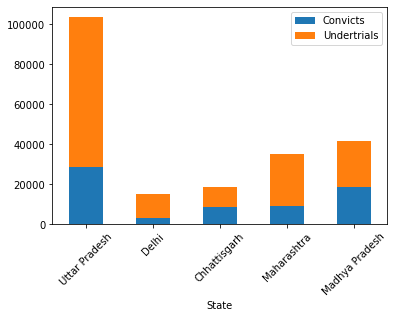

In [10]:
jail_high_occup.plot.bar(stacked = True, rot = 45)
plt.show()

It is now clear that in all 5 big states with high occupancy rates, the undertrials form a very large proportions. 
National Judicial Data Grid Portal (https://njdg.ecourts.gov.in/hcnjdgnew/) Data for various High Courts in India is indicating that large number of undertrials could be due to 'pendency in court cases'. 

Criminals with weeker socio-economic background very often find it difficult to secure bails.

For the Next part of our analysis we will study the nature of undertrials. 

In [11]:
caste_under = pd.read_csv('Caste_of_Undertrials.csv', index_col = 1)
religion_under = pd.read_csv('Religion_of_Undertrials.csv', index_col = 1)
edu_under = pd.read_csv('Education_of_Undertrial.csv', index_col = 1)

In [16]:
print(caste_under.columns)

Index(['Index', 'SC', 'ST', 'OBC', 'Others', 'Total'], dtype='object')


Lets us compute the total across all caste category and find their proportion in grand total. We will then compare this with the population statistics. 

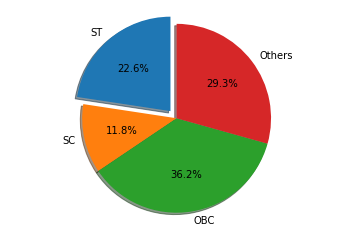

In [41]:
# Pie chart of distribution
labels = 'ST', 'SC', 'OBC', 'Others'
grand_caste = [caste_under['SC'].sum(), caste_under['ST'].sum(), caste_under['OBC'].sum(), caste_under['Others'].sum()]
explode = (0.1,0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(grand_caste, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

The the caste-wise distribution of undertrials is not very different from there actual distribution in population for OBCs and Others. ST's form around 9% of India's population (https://www.statista.com/statistics/1001016/india-population-share-by-caste/) and yet form a disproportionate part of Undertrials. So clearly there is are some disparities in legal aid. 

Let's Do similar analysis on religion-wise distribution of undertrials. 

In [42]:
print(religion_under.columns)

Index(['Index', 'Hindu', 'Muslim', 'Sikh', 'Christian', 'Others', 'Total'], dtype='object')


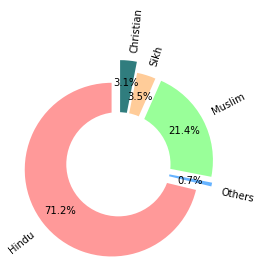

In [58]:
# Pie chart of distribution
labels = ['Hindu', 'Others', 'Muslim', 'Sikh', 'Christian']
sizes = [religion_under['Hindu'].sum(), religion_under['Others'].sum(), religion_under['Muslim'].sum(), religion_under['Sikh'].sum(), religion_under['Christian'].sum()]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#307D7E']
explode = (0.1,0.1,0.1,0.075, 0.2)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.75, explode = explode, rotatelabels =True)
#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

So clearly ther isn't much disproportionality in terms of religion. Religion-wise distribution is fairly representational of general population of India. 

In [45]:
edu_under.columns

Index(['Index', 'Illiterate', 'Below Class X', 'Below Graduation', 'Graduate',
       'Educational Standard - Holding Tech. Degree /Diploma', 'Post Graduate',
       'Educational Standard -Total'],
      dtype='object')

Let's add another column to this Pandas Dataframe which notes and % of Illiterates for each state. 

In [50]:
edu_under['Illiterate Percentage'] = (edu_under['Illiterate']*100)/edu_under['Educational Standard -Total']

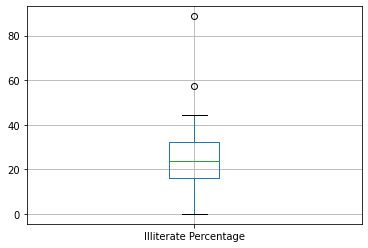

In [54]:
edu_under.boxplot(column = 'Illiterate Percentage')
plt.show()

So the Illiterate Pecentage is between inter-quartile range of 18-35. And we have two outliers.

Let's find out the outliers. 

In [74]:
edu_under[edu_under['Illiterate Percentage'] > 50]

,Index,Illiterate,Below Class X,Below Graduation,Graduate,Educational Standard - Holding Tech. Degree /Diploma,Post Graduate,Educational Standard -Total,Illiterate Percentage
State,,,,,,,,,
West Bengal,29,9453,4631,1912,439,1,42,16478,57.367399
Daman & Diu,33,39,5,0,0,0,0,44,88.636364


So the two states with higher proportion of illerate percetage West-Bengal and Daman&Diu. Literacy can be a big handicap in the course of complete justice. 

Now we can try find a relationship if any between Illiterate Percentage and Higher Proportion of Undertrials in a State. 

In [61]:
# defining new variable in jail occupancy table. 


jail_occup['Undertrial Percentage'] = (jail_occup['Undertrials']*100)/jail_occup['Total Prisoners']

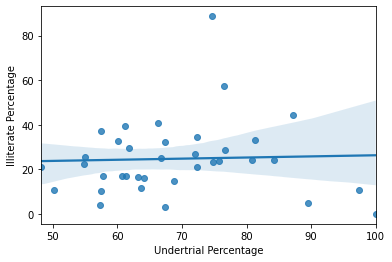

In [72]:
# Scatter-Plot between the two variables. 

import seaborn as sns
sns.regplot(x= jail_occup['Undertrial Percentage'],
            y=edu_under['Illiterate Percentage'])

plt.show()

Clearly Literacy has little impact on Proportion of Undertrials in a Prison. 

### Conclusion 

1. Overcrowding as a problem is restricted to a few states. Among bigger states, the focus should be on M.P., U.P, Chattisgarh, Delhi and Maharastra. All these States have a disproportionately larger share of undertrials, so the respective law courts will have to find ways to find ways to fasten the process. 


2. One cannot infer and caste/religious disparity in distribution of Undertrials apart from the fact that STs are over-represented among Undertrials.


3. Illiteracy among Undertrials lies in IQR of 18-35. 

### Scope/ Futher Study

1. Overcrowding can have a criminalizing impact. Those who are found 'not-guilty' after years of wait inside a prison, often come out and commit a crime. If survey is done to find out % of individuals undertrial who were finally found 'not-guilty', we can study its relationship with recidivism. Also a sytem can be divised to classify the prisoners inside the prison, to limit their contact with hardened criminals. 


2. Undertrials can also be classified depending on the severity/time sensitivity of offence they are charged with. Undertrials charged with time sensitive cases should ideally have shorter 'waiting period before conviction'.


3. A system can be divised for Supreme Courts and Other Courts of India to prioritize their work based on more granular data. The system would intelligently order the casses according to variables such as 'severity of crime', 'age of undertrial' etc.




